# Assignment 1: Gaussian Quadrature

## 1) Find The Sample Points $x_k$

In [1]:
import numpy as np
import jax
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import scipy.integrate
import math

In [2]:
#f = lambda x: x**3-100*x**2-x+100. # example from scipy.optimize
#print(fsolve(f, [2, 80]))

f0 = lambda x: 1
f1 = lambda x: x
f2 = lambda x: (3*x**2 -1)/2
f3 = lambda x: (5*x**3 - 3*x) / 2
f4 = lambda x: (35*x**4 - 30*x**2 + 3) / 8
f5 = lambda x: (63*x**5 - 70*x**3 + 15*x) / 8
f6 = lambda x: (231*x**6 - 315*x**4 + 105*x**2 - 5) / 16
f7 = lambda x: (429*x**7 - 693*x**5 + 315*x**3 - 35*x) / 16

fs = [f0, f1, f2, f3, f4, f5, f6, f7]

coeffs_f0 = np.array([1])
coeffs_f1 = np.array([1, 0])
coeffs_f2 = np.array([3/2, 0, -1/2])
coeffs_f3 = np.array([5/2, 0, -3/2, 0])
coeffs_f4 = np.array([35/8, 0, -30/8, 0, 3/8])
coeffs_f5 = np.array([63/8, 0, -70/8, 0, 15/8, 0])
coeffs_f6 = np.array([231/16, 0, -315/16, 0, 105/16, 0, -5/16])
coeffs_f7 = np.array([429/16, 0, -693/16, 0, 315/16, 0, -35/16, 0])

fs_coeffs = [coeffs_f0, coeffs_f1, coeffs_f2, coeffs_f3, coeffs_f4, coeffs_f5, coeffs_f6, coeffs_f7]

In [3]:
""""
x = np.linspace(-1, 1, 100)

fs_coeffs_ders = [np.polyder(fs_coeff) for fs_coeff in fs_coeffs] # this numpy function takes first derivatives of polynomials
print(fs_coeffs_ders)

fs_der = [np.polyval(fs_coeffs_der, x) for fs_coeffs_der in fs_coeffs_ders] # this numpy function reconstructs the polynomial and evaluates on a given range 
"""

'"\nx = np.linspace(-1, 1, 100)\n\nfs_coeffs_ders = [np.polyder(fs_coeff) for fs_coeff in fs_coeffs] # this numpy function takes first derivatives of polynomials\nprint(fs_coeffs_ders)\n\nfs_der = [np.polyval(fs_coeffs_der, x) for fs_coeffs_der in fs_coeffs_ders] # this numpy function reconstructs the polynomial and evaluates on a given range \n'

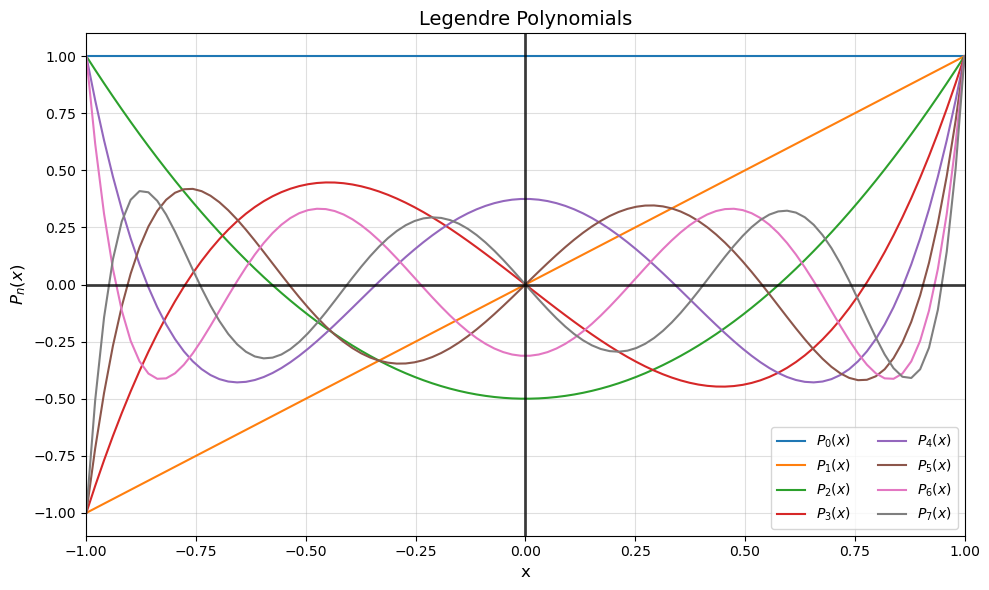

In [ ]:
# Replicating the plot for the Legendre polynomials on Wikipedia page: "Legendre polynomials".

xs = np.linspace(-1, 1, 100)

plt.figure(figsize=(10, 6))
for i, f in enumerate(fs):
    ys = jax.vmap(f)(xs) 
    
    plt.plot(xs, ys, label=f'$P_{i}(x)$')

plt.xlim(-1, 1) 
plt.axhline(0, color='black', linestyle='-', linewidth=2, alpha=0.75) # googled this instance
plt.axvline(0, color='black', linestyle='-', linewidth=2, alpha=0.75) # googled this instance
plt.title("Legendre Polynomials", fontsize=14)
plt.xlabel("x",fontsize=12)
plt.ylabel("$P_n(x)$", fontsize=12)
plt.legend(fontsize=10, loc='lower right', ncol=2)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

In [5]:
exact_roots = []

for i, coeffs in enumerate(fs_coeffs):
    roots = np.roots(coeffs) 
    exact_roots.append(roots)
print(exact_roots)

[array([], dtype=float64), array([0.]), array([-0.57735027,  0.57735027]), array([-0.77459667,  0.77459667,  0.        ]), array([-0.86113631,  0.86113631, -0.33998104,  0.33998104]), array([-0.90617985, -0.53846931,  0.90617985,  0.53846931,  0.        ]), array([-0.93246951, -0.66120939,  0.93246951,  0.66120939, -0.23861919,
        0.23861919]), array([-0.94910791, -0.74153119, -0.40584515,  0.94910791,  0.74153119,
        0.40584515,  0.        ])]


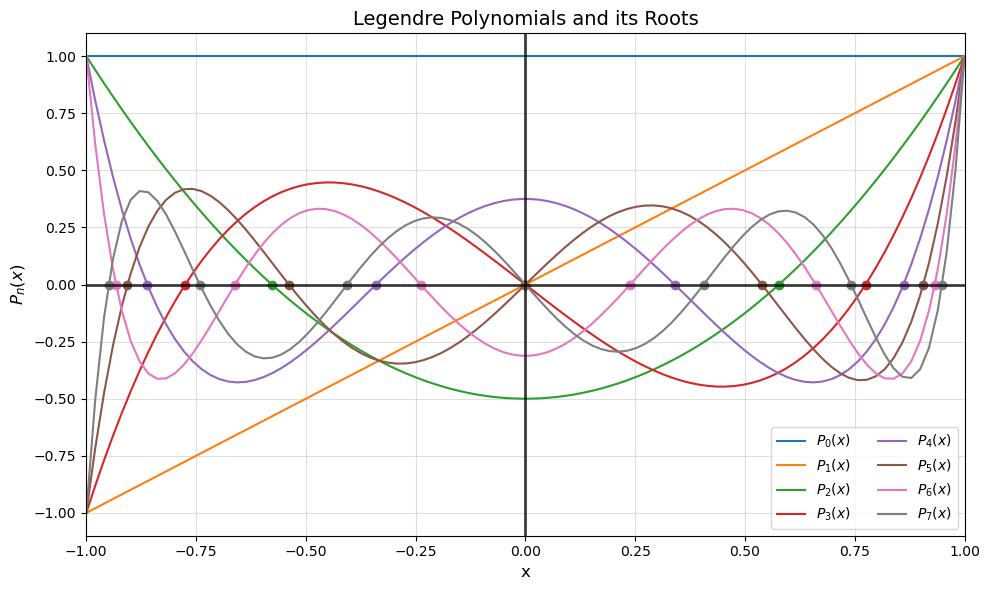

In [6]:
# Replot of the Legendre polynomials, but with the exact rules calculated using "np.roots".

xs = np.linspace(-1, 1, 100)

plt.figure(figsize=(10, 6))
for i, (f, roots) in enumerate(zip(fs, exact_roots)):
    ys = jax.vmap(f)(xs) 
    
    plt.plot(xs, ys, label=f'$P_{i}(x)$')
    plt.scatter(roots, [f(r) for r in roots])

plt.xlim(-1, 1) 
plt.axhline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.axvline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.title("Legendre Polynomials and its Roots", fontsize=14)
plt.xlabel("x",fontsize=12)
plt.ylabel("$P_n(x)$", fontsize=12)
plt.legend(fontsize=10, loc='lower right', ncol=2)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
def newton(order, x0, tol=1e-14, max_iter=1000, verbose=False): # function written with inspiration on newton(func, x0, ...) from scipy.optimize
    x = float(x0)
    x_intermediate = [x]

    f = fs[order]
    f_deriv_coeffs = np.polyder(fs_coeffs[order])

    iter = 0
    for i in range(max_iter):
        delta_x = f(x) / np.polyval(f_deriv_coeffs, x) # or use jax.grad() to evaluate the derivatives
        x = x - delta_x
        x_intermediate += [x]
        iter += 1

        if verbose:
            print(f"Iteration {iter}:")
            print("x: {:.6f}".format(x))
            print("f(x): {:.6f}".format(f(x)))
            print("Delta x: {:.6f}\n".format(delta_x))
        if np.abs(delta_x) < tol or np.abs(f(x)) < tol: # using abs(f(x)) < tol instead of abs(f(x)) == 0, otherwise loop doesn't break until max_iter
            if verbose: print(f"Convergence reached at iteration {iter}.")
            break
    else:
        if verbose: print("Reached max_iter without meeting tolerance.")
    return x

In [ ]:
x0 = 7.
root2 = newton(2, x0=x0, verbose = True)

print("\n The root and its value are:", root2, f2(root2))

Iteration 1:
x:       3.523810
f(x):    18.125850
Delta x: 3.476190

Iteration 2:
x:       1.809202
f(x):    4.409818
Delta x: 1.714607

Iteration 3:
x:       0.996723
f(x):    0.990184
Delta x: 0.812479

Iteration 4:
x:       0.665576
f(x):    0.164487
Delta x: 0.331147

Iteration 5:
x:       0.583198
f(x):    0.010179
Delta x: 0.082378

Iteration 6:
x:       0.577380
f(x):    0.000051
Delta x: 0.005818

Iteration 7:
x:       0.577350
f(x):    0.000000
Delta x: 0.000029

Iteration 8:
x:       0.577350
f(x):    0.000000
Delta x: 0.000000

Convergence reached at iteration 8.

 The root is and value of the root found is: 0.5773502691896257 0.0


In [9]:
def find_all_roots(order, ansatzes = np.linspace(-0.9, 0.9, 7), Verbose = False):
    roots = []
    while len(roots) < order:
        for i in range(len(ansatzes)):
            root = newton(order, ansatzes[i])
            if root not in roots:
                roots.append(root)
    return roots

In [10]:
roots = find_all_roots(3)

In [11]:
all_roots = []

for i in range(len(fs)):
    all_roots.append(find_all_roots(i))

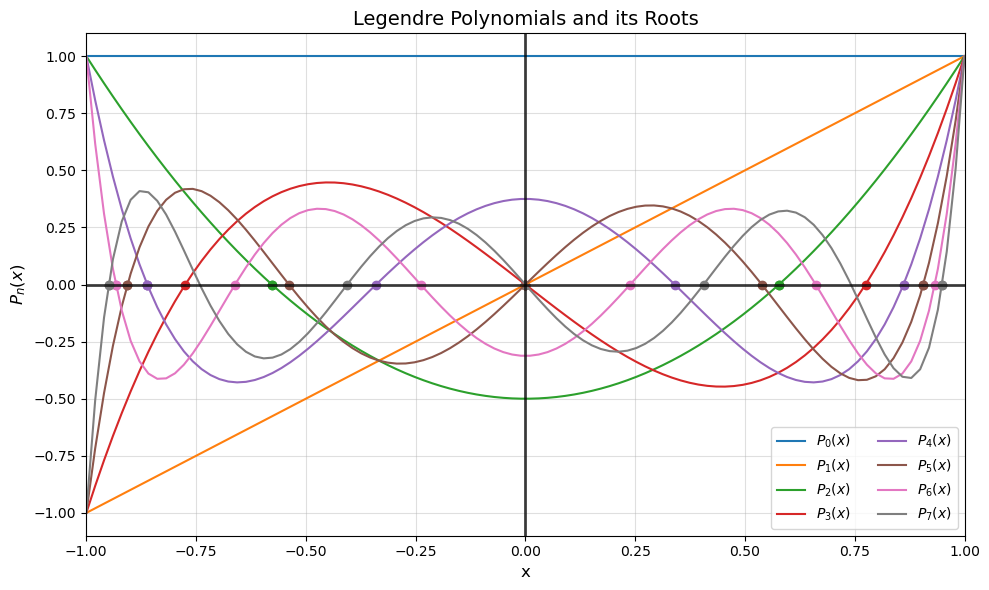

In [12]:
# Replot of the Legendre polynomials with the newly found roots.

xs = np.linspace(-1, 1, 100)

plt.figure(figsize=(10, 6))
for i, (f, roots) in enumerate(zip(fs, all_roots)):
    ys = jax.vmap(f)(xs) 
    
    plt.plot(xs, ys, label=f'$P_{i}(x)$')
    plt.scatter(roots, [f(r) for r in roots])

plt.xlim(-1, 1) 
plt.axhline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.axvline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.title("Legendre Polynomials and its Roots", fontsize=14)
plt.xlabel("x",fontsize=12)
plt.ylabel("$P_n(x)$", fontsize=12)
plt.legend(fontsize=10, loc='lower right', ncol=2)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

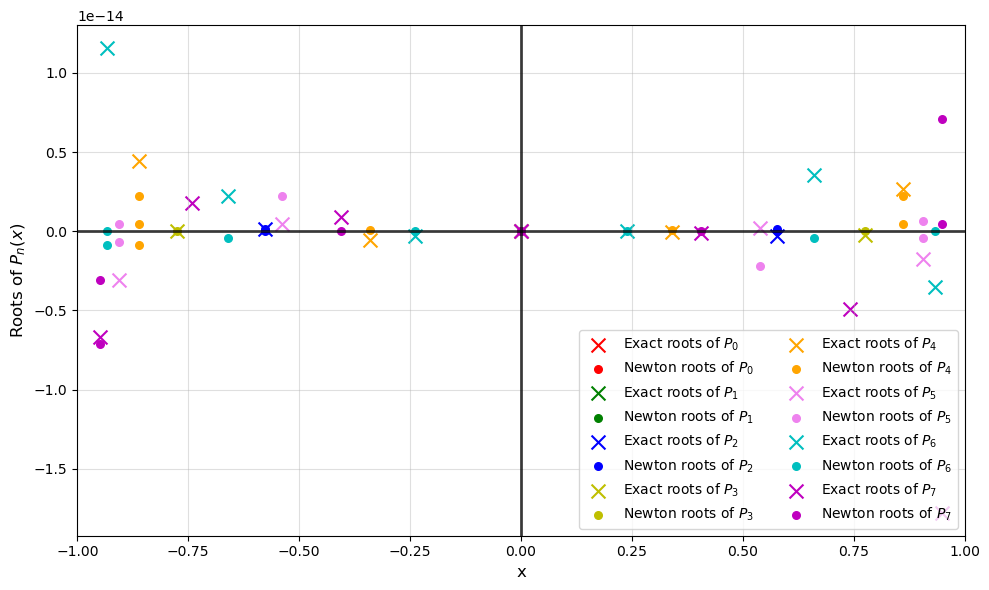

In [13]:
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y', 'orange', 'violet', 'c', 'm']
for i, (f, exact_root, approx_root) in enumerate(zip(fs, exact_roots, all_roots)):
    exact = exact_roots[i]
    approx = all_roots[i]
    color = colors[i]

    plt.scatter(exact, [f(r) for r in exact], marker='x', s=100, color = color, label=f'Exact roots of $P_{i}$')
    plt.scatter(approx, [f(r) for r in approx], marker='o', s=30, color = color, label=f'Newton roots of $P_{i}$')
plt.xlim(-1, 1) 
plt.axhline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.axvline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.xlabel("x",fontsize=12)
plt.ylabel("Roots of $P_n(x)$", fontsize=12)
plt.legend(fontsize=10, loc='lower right', ncol=2)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

I note that, for instance, the approximated roots of $P_7(x)$ is degenerate. The find_all_roots() algorithm needs to be improved.

In [14]:
def find_all_roots(order, ansatzes = np.linspace(-0.9, 0.9, 7), Verbose = False):
    roots = []
    while len(roots) < order:
        for i in range(len(ansatzes)):
            root = newton(order, ansatzes[i])
            if np.round(root, 1) not in np.round(roots, 1):
                roots.append(root)
    return roots

In [15]:
""""
# find a way to parallelize this routine because the runtime is too long

all_roots = []

for i in range(len(fs)):
    all_roots.append(find_all_roots(i))
"""
all_roots = []

for i in range(len(fs[:-1])):
    all_roots.append(find_all_roots(i))

In [16]:
roots_7 = find_all_roots(7, ansatzes=([-1., -.75, -.5, 0, .5, .75, 1.])) # ansatzes determined through visual inspection
all_roots.append(roots_7)
print(len(all_roots)), roots_7

8


(None,
 [np.float64(-0.9491079123427584),
  np.float64(-0.741531185599395),
  np.float64(-0.40584515137739824),
  np.float64(0.0),
  np.float64(0.40584515137739824),
  np.float64(0.741531185599395),
  np.float64(0.9491079123427584)])

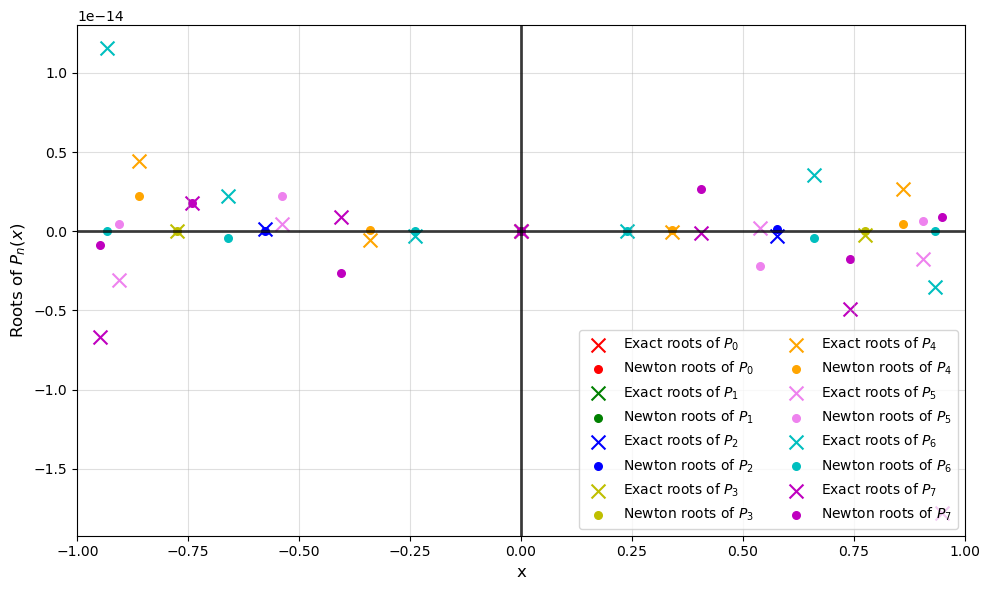

In [17]:
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y', 'orange', 'violet', 'c', 'm']
for i, (f, exact_root, approx_root) in enumerate(zip(fs, exact_roots, all_roots)):
    exact = exact_roots[i]
    approx = all_roots[i]
    color = colors[i]

    plt.scatter(exact, [f(r) for r in exact], marker='x', s=100, color = color, label=f'Exact roots of $P_{i}$')
    plt.scatter(approx, [f(r) for r in approx], marker='o', s=30, color = color, label=f'Newton roots of $P_{i}$')
plt.xlim(-1, 1) 
plt.axhline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.axvline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.xlabel("x",fontsize=12)
plt.ylabel("Roots of $P_n(x)$", fontsize=12)
plt.legend(fontsize=10, loc='lower right', ncol=2)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

## 2) Find The Weights $w_k$

In [18]:
def indicator_poly_func(xs, samples, k):
    
    func = xs * 0 + 1 # having func = 1 causes conflict with simp func for k = 1  as it calls for arrays not integers
    x_k = samples[k]
    for i in range(len(samples)):
        if i == k:
            continue
        func *= ((xs - samples[i])/(x_k - samples[i]))
    return func

In [19]:
xs = np.linspace(-1, 1, 100)
for i in range(len(roots_7)):
    ind_coeffs = indicator_poly_func(xs, roots_7, i)
ind_coeffs_7 = ind_coeffs[-1]
ind_coeffs_7, np.round(ind_coeffs_7)

(np.float64(1.5746624997105538), np.float64(2.0))

<>:14: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:20: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:14: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
<>:20: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_1478/162671671.py:14: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
  plt.plot(xs, ind_coeffs, alpha = .55, label=f'$\phi_{i}$')
/var/folders/6y/t0pn3j7n35bdz5_644h0yzd00000gn/T/ipykernel_1478/162671671.py:20: SyntaxWarning:

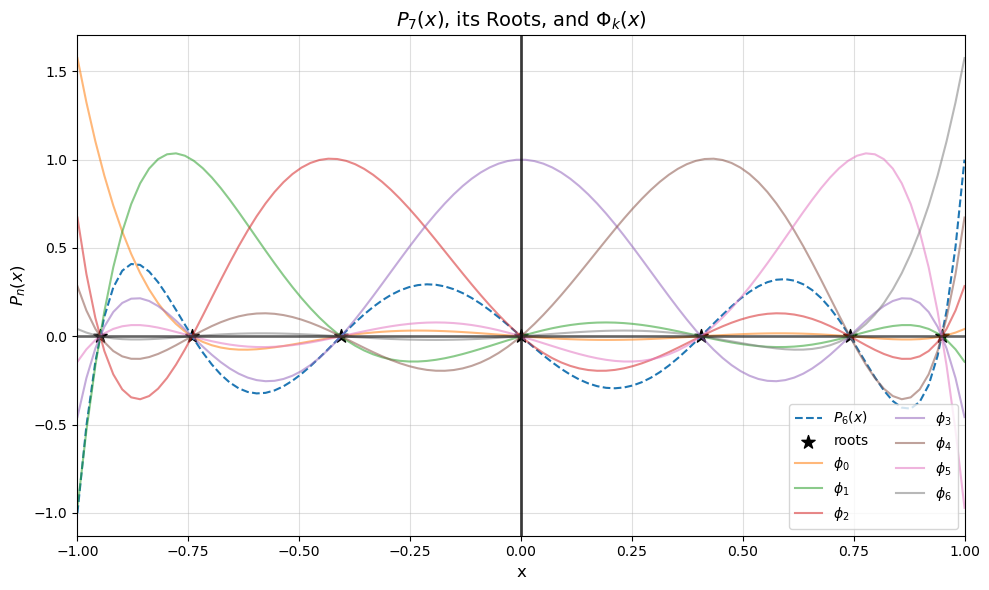

In [ ]:
plt.figure(figsize=(10, 6))

xs = np.linspace(-1, 1, 100)
ys = jax.vmap(f7)(xs) 
colors = ['r', 'g', 'b', 'y', 'orange', 'violet', 'c']

plt.plot(xs, ys, '--', label=f'$P_{i}(x)$')
plt.scatter(all_roots[7], [f7(r) for r in all_roots[7]], marker='*', s=100, color = 'k' , alpha = 1., label = "roots")

for i in range(len(roots_7)):
    ind_coeffs = indicator_poly_func(xs, roots_7, i)
    plt.plot(xs, ind_coeffs, alpha = .55, label=f'$\phi_{i}$')


plt.xlim(-1, 1) 
plt.axhline(0, color='black', linestyle='-', linewidth=2, alpha=0.55)
plt.axvline(0, color='black', linestyle='-', linewidth=2, alpha=0.75)
plt.title("$P_7(x)$, its Roots, and $\Phi_k(x)$", fontsize=14)
plt.xlabel("x",fontsize=12)
plt.ylabel("$P_n(x)$", fontsize=12)
plt.legend(fontsize=10, loc='lower right', ncol=2)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


In [21]:
def simp(a, b, n, f, *f_args, **f_kwargs):
    """
    Computes fourth-order approximation of the integral of f from a to b

    a:  float, lower integration limit
    b:  float, upper integration limit
    n:  int, number of samples to use, will use 2*n + 1 function evals
    f:  function  f(x, ...) which takes x (an array of floats [x0, x1, ...])
        and returns an array containing the function evaluated on each x:
        [f(x0), f(x1), ...]
    *f_args:    extra positional arguments for f
    **f_kwargs: extra keyword arguments for f

    The error should scale like 1 / n^4
    """

    # Make the array of sample points.
    # [a     a+h   a+2h  a+3h  a+4h ... b-2h    b-h     b    ]
    # [x[0]  x[1]  x[2]  x[3]  x[4] ... x[2n-2] x[2n-1] x[2n]]
    # [1     4     1|1   4     1 |  ...  |1     4       1    ]
    # [ parabola 0  | parabola 1 |  ...  |   parabola n      ]
    xk = np.linspace(a, b, 2*n+1)

    # Evaluate f
    fk = f(xk, *f_args, **f_kwargs)

    # Step size
    h = xk[1] - xk[0]

    # Simpson's rule
    return h * (fk[0] + fk[-1] + 4*fk[1:-1:2].sum() + 2*fk[2:-2:2].sum()) / 3.0

In [22]:
def weights_fun(k):
    samples = all_roots[k]

    all_weights_k =[]
    for i in range(len(samples)):
        phi_i = lambda x: indicator_poly_func(x, samples, i)

        weight_i = simp(-1, 1, 1000, phi_i)
        all_weights_k.append(weight_i)
    return np.array(all_weights_k)

## 3) Integrate!

In [23]:
def integral_func(a, b, Nsub, f, k):
    samples = np.array(all_roots[k])
    weights = np.array(weights_fun(k))
    h = (b - a)/ Nsub

    total = 0
    for j in range(Nsub):
        aj = a + h * j 
        aj_plus_1 = a + h * (j+1)

        m = (aj_plus_1 + aj)/2
        w = (aj_plus_1 - aj)/2

        total += np.sum(w * weights * f(w * samples + m))
    return total

In [24]:
test_f = lambda x: x
res = integral_func(0, 1, 10, test_f, 3)
print(res)

res = integral_func(0, 1, 10, test_f, 7)
print(res)

res = integral_func(0, 1, 100, test_f, 7)
print(res)

res = integral_func(0, 1, 10000, test_f, 7)
print(res) # not bad at all, for an expected result of .5

0.5000000000000004
0.5000000000000004
0.5000000000000003
0.5000000000000004


In [25]:
exp_f = lambda x: np.exp(x)
res = integral_func(0, 1, 10, exp_f, 3)
print(res)
exact_exp_f = np.exp(1) - 1
exact_exp_f 

1.7182818284581947


np.float64(1.718281828459045)

In [26]:
Nsubs = [10, 100, 1000, 100000]
orders = range(8)

err_ls = np.zeros((len(fs), len(Nsubs)))
for i, k in enumerate(orders):
    for j, nsub in enumerate(Nsubs):
        res = integral_func(0, 1, nsub, exp_f, k)
        err = np.abs((exact_exp_f - res) / exact_exp_f)
        err_ls[i, j] = err

In [27]:
err_ls

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.16545171e-04, 4.16665451e-06, 4.16666645e-08, 4.16866243e-12],
       [2.31408005e-08, 2.31376983e-12, 0.00000000e+00, 3.23061970e-15],
       [4.94930938e-13, 1.55069746e-15, 1.29224788e-16, 3.35984449e-15],
       [9.04573516e-16, 1.16302309e-15, 0.00000000e+00, 3.48906927e-15],
       [9.04573516e-16, 1.03379830e-15, 0.00000000e+00, 3.61829406e-15],
       [9.04573516e-16, 1.29224788e-15, 1.29224788e-16, 3.48906927e-15],
       [9.04573516e-16, 1.16302309e-15, 0.00000000e+00, 3.48906927e-15]])

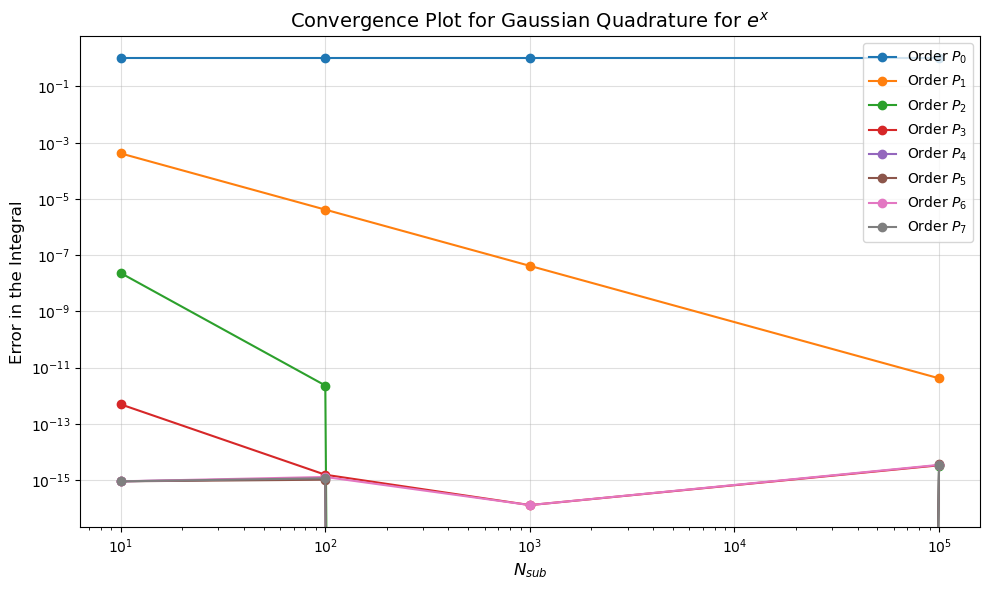

In [28]:
plt.figure(figsize=(10, 6))

for i, k in enumerate(orders):
    plt.loglog(Nsubs, err_ls[i, :], '-o', label=f'Order $P_{k}$')

plt.xlabel('$N_{sub}$', fontsize=12)
plt.ylabel('Error in the Integral', fontsize=12)
plt.title('Convergence Plot for Gaussian Quadrature for $e^x$', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

The actual number of evaluation is N x $\textrm{N}_{sub}$.

In [29]:
test1_f = lambda x: x**(1/3) + (1/(1 + 100 * (x-5)**2))
exact_test1_f, _ = scipy.integrate.quad(test1_f, 1, 10)
print(exact_test1_f)
res = integral_func(1, 10, 100000, test1_f, 7)
print(res)

15.717920227838922
15.717920227838746


In [30]:
Nsubs = [10, 100, 1000, 100000]
orders = range(8)
f = test1_f
exact_res = exact_test1_f

err_ls = np.zeros((len(fs), len(Nsubs)))
for i, k in enumerate(orders):
    for j, nsub in enumerate(Nsubs):
        res = integral_func(1, 10, nsub, f, k)
        err = np.abs((exact_res - res) / exact_res)
        err_ls[i, j] = err

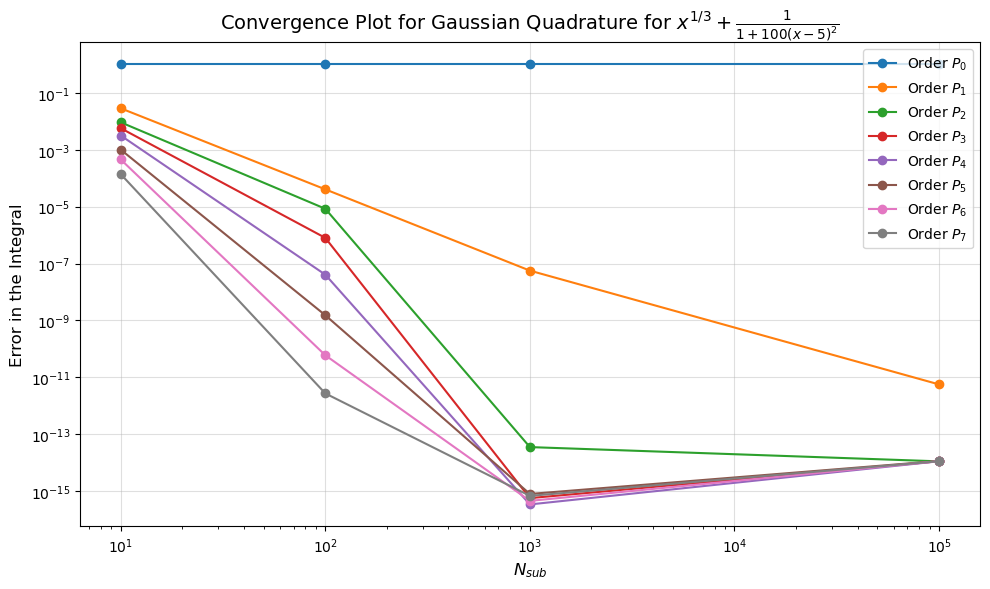

In [ ]:
plt.figure(figsize=(10, 6))

for i, k in enumerate(orders):
    plt.loglog(Nsubs, err_ls[i, :], '-o', label=f'Order $P_{k}$')

plt.xlabel('$N_{sub}$', fontsize=12)
plt.ylabel('Error in the Integral', fontsize=12)
plt.title(f'Convergence Plot for Gaussian Quadrature for $x^{1/3} + \frac{1}{1 + 100(x-5)^2}$', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

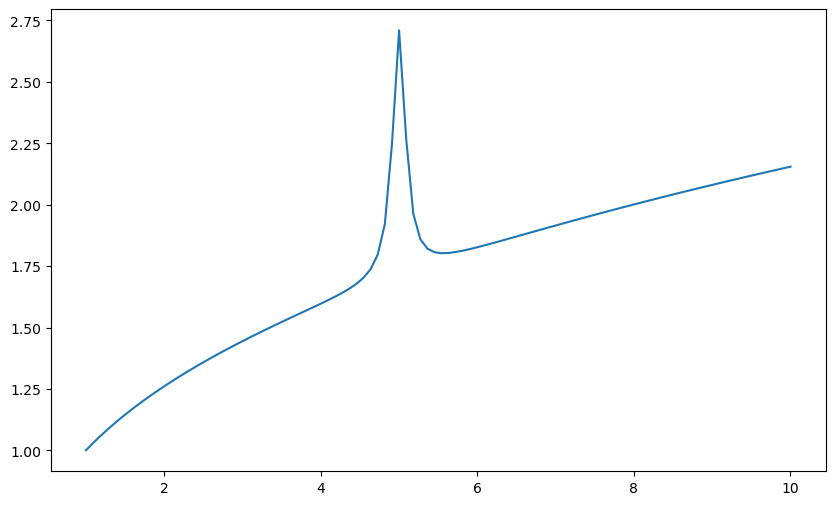

In [32]:
plt.figure(figsize=(10, 6))

plt.plot(np.linspace(1,10,100), f(np.linspace(1,10,100)))
plt.show()

The schemes need more evaluations in order to converge because the function has an abrupt spike, breaking the symmetry and continuity. Given the symmetry/continuity of the Legendre polynomials, more evaluations are needed in order to capture this asymmetry of the function. Around 1,000 points most of the schemes are convergent because the subintervals are now small enough to register this narrow spike.

In [33]:
test2_f = lambda x: x**(5) * np.abs(x)
exact_test2_f, _ = scipy.integrate.quad(test2_f, -math.pi, 4-math.pi)
print(exact_test2_f)
res = integral_func(-math.pi, 4-math.pi, 100000, test2_f, 7)
print(res)

-431.4213979079517
-431.42139790308124


In [37]:
Nsubs = [10, 100, 1000, 100000]
orders = range(8)
f = test2_f
exact_res = exact_test2_f

err_ls = np.zeros((len(fs), len(Nsubs)))
for i, k in enumerate(orders):
    for j, nsub in enumerate(Nsubs):
        res = integral_func(-math.pi, 4-math.pi, nsub, f, k)
        err = np.abs((exact_res - res) / exact_res)
        err_ls[i, j] = err

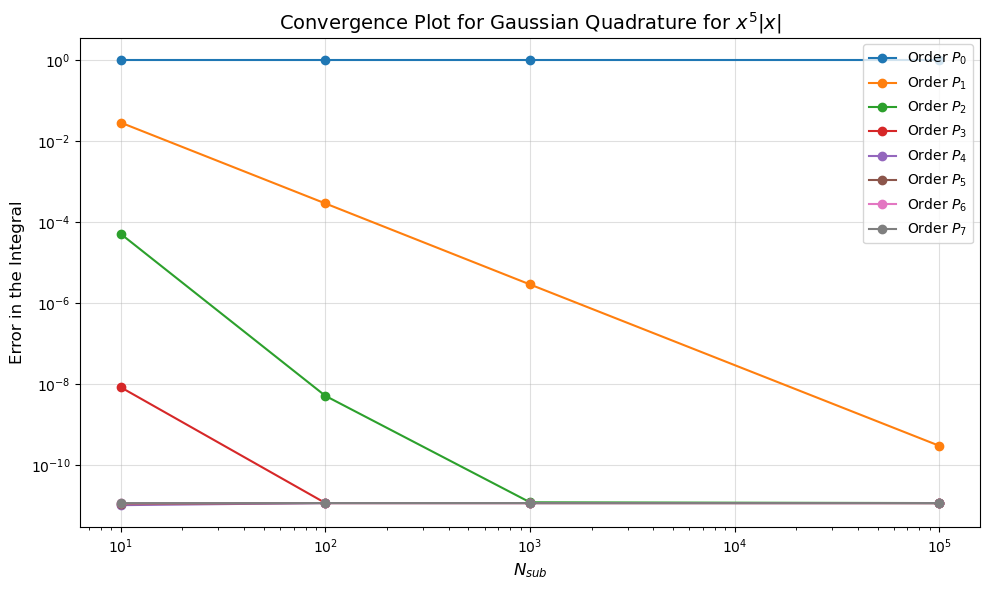

In [40]:
plt.figure(figsize=(10, 6))

for i, k in enumerate(orders):
    plt.loglog(Nsubs, err_ls[i, :], '-o', label=f'Order $P_{k}$')

plt.xlabel('$N_{sub}$', fontsize=12)
plt.ylabel('Error in the Integral', fontsize=12)
plt.title(r'Convergence Plot for Gaussian Quadrature for $x^5|x|$', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

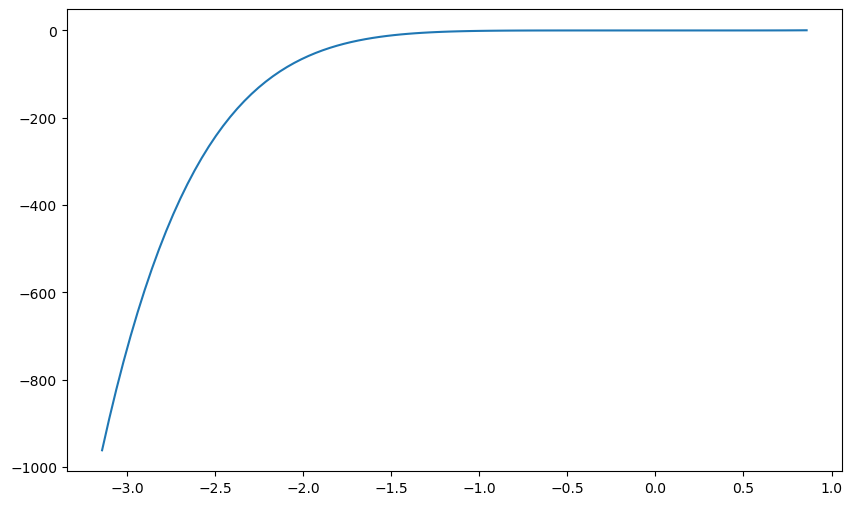

In [39]:
plt.figure(figsize=(10, 6))

plt.plot(np.linspace(-math.pi, 4-math.pi, 100), f(np.linspace(-math.pi, 4-math.pi, 100)))
plt.show()

Curiously, it seems that even schemes converge faster than odd, despite the function being odd. I believe the parity of the scheme and the function affects the rate of convergence.